In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
import statsmodels

In [2]:
from all_models import *

In [3]:
fits_single = pickle.load(open('fit_single_CV_704.pickle', 'rb'))
curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/(np.pi/2)


In [4]:
all_A = np.zeros(32*100)
all_B = np.zeros(32*100)
for i in range(100):
    all_A[i*32:(i+1)*32] = fits_single[i][:, 0]
    all_B[i*32:(i+1)*32] = fits_single[i][:, 1]


In [6]:
parameters_df = pd.DataFrame({'Participant_Id': np.tile(range(32), 100),
                         'Rotation': np.tile(['Sudden', 'Gradual'], 16*100), 
                         'A': all_A,
                         'B': all_B,
                        })

In [8]:
parameters_means = parameters_df.groupby(['Participant_Id', 'Rotation']).mean().reset_index()

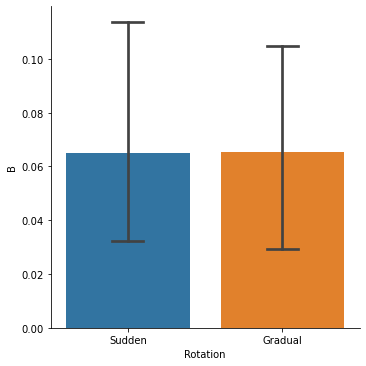

In [12]:
#sns.set_context('talk')
#sns.set_style('white')
sns.catplot(x = 'Rotation', y = 'B', data = parameters_means, kind = 'bar', capsize = 0.2)